In [ ]:
#from threads_to_doc_list import threads_to_doc_list

In [35]:
filename = '/kaggle/input/reddit-worldcup/reddit_worldcup_data_500_weekly2022-11-21 11_56_41.json'

#doc_list = threads_to_doc_list(filename)#, 1668988801)
doc_list = threads_to_exploded_doc_list(filename, 1668988801)

In [6]:
from stop_words import get_stop_words
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from gensim import corpora, models
import pandas as pd
import gensim
import pyLDAvis.gensim
import nltk

nltk.download('omw-1.4', quiet=True)

/opt/conda/lib/python3.7/site-packages/past/types/oldstr.py:36: DeprecationWarning: invalid escape sequence \d
  """
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


True

In [7]:
drop_word_list = ['www', 'http', 'com', 'country', 'world', 'cup']
pattern = r'\b[^\d\W]+\b'
tokenizer = RegexpTokenizer(pattern)
en_stop_and_drop_list = get_stop_words('en') + drop_word_list
lemmatizer = WordNetLemmatizer()


In [9]:
def preprocess_doc(doc):
    doc = doc.lower()
    tokenized_doc = tokenizer.tokenize(doc)
    no_stop_word_tokens = [token for token in tokenized_doc if not token in en_stop_and_drop_list]
    lemma_tokens = [lemmatizer.lemmatize(token) for token in no_stop_word_tokens]
    processed_doc = [token for token in lemma_tokens if not len(token) == 1]
    return processed_doc

def preprossess_doc_list(doc_list):
    clean_doc_list = []
    for d in doc_list:
        clean_doc_list.append(preprocess_doc(d))
    return clean_doc_list
        

In [10]:
processed_doc_list = preprossess_doc_list(doc_list)

In [68]:
# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(word_list_lemmatized)#processed_doc_list)
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(doc) for doc in word_list_lemmatized]#processed_doc_list]

In [69]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=10, id2word = dictionary, passes=20)
import pprint
pprint.pprint(ldamodel.top_topics(corpus,topn=5))

[([(0.02457612, 'football'),
   (0.021753179, 'country'),
   (0.019047212, 'support'),
   (0.018760134, 'team'),
   (0.014131869, 'people')],
  -1.8418240801622825),
 ([(0.025225699, 'stadium'),
   (0.021816112, 'beer'),
   (0.014108583, 'people'),
   (0.014001503, 'ban'),
   (0.013648449, 'alcohol')],
  -2.2831193489645463),
 ([(0.02599459, 'team'),
   (0.02558429, 'win'),
   (0.025202446, 'goal'),
   (0.024883142, 'good'),
   (0.023334939, 'game')],
  -2.358306807268566),
 ([(0.025623323, 'watch'),
   (0.02529482, 'go'),
   (0.01747145, 'team'),
   (0.016458105, 'even'),
   (0.01611952, 'bad')],
  -2.4762281293515214),
 ([(0.019069163, 'people'),
   (0.011407225, 'qatar'),
   (0.010829083, 'know'),
   (0.010252446, 'right'),
   (0.010171874, 'year')],
  -2.5082630467187124),
 ([(0.01757171, 'woman'),
   (0.013589774, 'make'),
   (0.012302193, 'man'),
   (0.0099559035, 'qatar'),
   (0.0088816, 'ever')],
  -2.992298613262664),
 ([(0.04962573, 'fan'),
   (0.013649741, 'get'),
   (0.0134

In [70]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)

/opt/conda/lib/python3.7/site-packages/pyLDAvis/_prepare.py:248: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.012892 -0.118582       1        1  16.481700
6      0.096193 -0.059038       2        1  15.199893
9     -0.187258 -0.161756       3        1  13.020991
1      0.060414  0.035156       4        1   9.785502
2      0.129005 -0.045667       5        1   9.725203
7      0.164339 -0.003546       6        1   9.289852
0      0.053601  0.002317       7        1   8.686888
4     -0.046533  0.238051       8        1   6.314630
5     -0.186877  0.025009       9        1   5.822505
3     -0.069992  0.088056      10        1   5.672837, topic_info=      Term        Freq       Total Category  logprob  loglift
102    fan  310.000000  310.000000  Default  30.0000  30.0000
883    win  153.000000  153.000000  Default  29.0000  29.0000
449   team  394.000000  394.000000  Default  28.0000  28.0000
240  watch  215.000000  215.000000  Default  27.0000  27.0000
390    lol   97.000000   97.000000  Default  26.0000  26.0000
..     ...         ...         ...      ...      ...      ...
939   wait   14.875834   49.617924  Topic10  -5.1666   1.6649
252   good   17.307496  270.884509  Topic10  -5.0152   0.1189
212   feel   14.733901  118.877773  Topic10  -5.1762   0.7815
86     say   15.431127  238.472488  Topic10  -5.1299   0.1316
278   play   12.202298  210.806860  Topic10  -5.3647   0.0202

[658 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
1427      2  0.954486          abuse
3299      8  0.941583  accommodation
323       2  0.042268         actual
323       7  0.591754         actual
323       8  0.295877         actual
...     ...       ...            ...
130       5  0.118001          wrong
130      10  0.065556          wrong
138       2  0.555727           year
138       3  0.187851           year
138       9  0.250469           year

[1224 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 7, 10, 2, 3, 8, 1, 5, 6, 4])

/opt/conda/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/conda/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/conda/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/conda/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


In [ ]:
print(ldamodel.get_document_topics(corpus))

In [ ]:
top_topics = []
for i, row in enumerate(ldamodel[corpus]):
    row = sorted(row, key=lambda x: (x[1]), reverse=True)
    top_topics.append(row)

In [ ]:
len(top_topics)

In [ ]:
top_topics[5]

In [20]:
doc_list[10]

'Nah. Pay FIFA enough money you can do whatever you want. They can have World Cups in Arab countries every year if they keep paying the corrupt FIFA organization.'

/opt/conda/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


In [5]:
len(doc_list)

5599

In [66]:
word_list_lemmatized = run_preprocess(doc_list, extra_stops=drop_word_list)

Tokenizing...

Removing Stopwords...

Create bigrams...

Lemmatizing, keeping NOUN,VERB,ADV,ADJ POS tags...



In [41]:
len(word_list_lemmatized)

286340

In [31]:
drop_word_list

['www', 'http', 'com', 'country', 'world', 'cup']

/opt/conda/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/conda/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/conda/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/conda/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


In [33]:
import urlparse

ModuleNotFoundError: No module named 'urlparse'

In [67]:
word_list_lemmatized[1]

['kind',
 'agree',
 'muslim',
 'country',
 'alcohol_sale',
 'ban',
 'special',
 'permit',
 'allow',
 'seller',
 'sell',
 'non',
 'muslim',
 'check',
 'sure',
 'similar',
 'rule',
 'exist',
 'qatar',
 'use',
 'thing',
 'let',
 'sell',
 'alcohol',
 'ban']

In [46]:
len(doc_list)

500

In [47]:
t = drop_urls(doc_list)

In [48]:
len(t)

286340

In [53]:
t[0]

'E'

In [54]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        #model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=10, id2word = dictionary, passes=20)

        model_list.append(model)
        coherencemodel = CoherenceModel(model=ldamodel, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

'Ecuador fan \U0001faf0💵  Minutes after ...\n\nhttps://twitter.com/football_ll55/status/1594384653896458240?t=bEktAjoJi4jX8x4d9btg1A&s=19 Oh no. Someone learning first hand what talking smack looks like at every other game on the planet The man complaining is going to be horrified when he meets England fans. I think they are clear in the half time\nhttps://twitter.com/superking1815/status/1594386086696222720?s=46&t=JnSYPuDtxkZ4-liPSi9ABw Hahahaha ah the qatari losing his mind. Fair play Lmaoo what a legend! Give it to them! Do people expect for fans to sit down and just watch the game???? Bruh look how Argentinians, Mexicans, English, etc watch football. This is the World Cup man people gotta do more shit like this and make it exciting This guy has balls and jokes. Love to see it Can\'t buy talent, just wish Ecuador scored more Bro the people of Qatar are not ready for Latin American fans Lol the other guy is mad pissed The same guy just explaining his emotions in this video.\n\n[https

In [54]:
import json

def load_data(filename):
    with open(filename,"r") as f:
        d = json.load(f)
    return d

def parse_submissions(data):
    doc_list = []
    for submission in data:
        submission_texts = submission.get('title', '') + ' ' + submission.get('selftext', '') + ' '
        for reply in submission.get('top_level_replies', []):
            submission_texts = submission_texts + reply.get('body', '') + ' '
        doc_list.append(submission_texts)
    return doc_list

def num_words(text):
    return len(text.split(' '))

def parse_submissions_exploded(data, latest_time=None):
    doc_list = []
    for submission in data:
        if latest_time is None or submission.get('created_utc', 0) <= latest_time:
            if num_words(submission.get('title', '')) >= 5:
                doc_list.append(submission.get('title', ''))
            for reply in submission.get('top_level_replies', []):
                if num_words(reply.get('body', '')) >= 5:
                    doc_list.append(reply.get('body', ''))
    return doc_list

def threads_to_doc_list(filename):
    data = load_data(filename)
    return parse_submissions(data)

def threads_to_exploded_doc_list(filename, latest_time=None):
    data = load_data(filename)
    return parse_submissions_exploded(data, latest_time)

In [55]:
filename = '/kaggle/input/reddit-worldcup/reddit_worldcup_data_500_weekly2022-11-21 11_56_41.json'

#doc_list = threads_to_doc_list(filename)#, 1668988801)
doc_list = threads_to_exploded_doc_list(filename, 1668988801)
doc_list = [re.sub(r'http\S+', '', txt) for txt in doc_list]
doc_list = [re.sub(r'www\S+', '', txt) for txt in doc_list]

In [50]:
#!pip install -q top2vec
#!pip install -q sentence_transformers

In [51]:
!pip install -q top2vec[sentence_encoders]

In [31]:
#!pip install tensorflow tensorflow_hub tensorflow_text

In [2]:
import numpy as np 
import pandas as pd 
import json
import os
from top2vec import Top2Vec
import re

2022-12-02 15:27:23.487092: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-02 15:27:23.683735: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/lib:/usr/local/lib/x86_64-linux-gnu:/usr/local/nvidia/lib:/usr/local/nvidia/lib64:
2022-12-02 15:27:23.683788: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-02 15:27:25.171519: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] 

In [56]:
top2vec = Top2Vec(documents=doc_list, speed="deep-learn", embedding_model='universal-sentence-encoder')

2022-12-02 16:36:37,559 - top2vec - INFO - Pre-processing documents for training
/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
2022-12-02 16:36:38,006 - top2vec - INFO - Downloading universal-sentence-encoder model
2022-12-02 16:36:44,385 - top2vec - INFO - Creating joint document/word embedding
2022-12-02 16:36:46,205 - top2vec - INFO - Creating lower dimension embedding of documents
2022-12-02 16:36:55,950 - top2vec - INFO - Finding dense areas of documents
2022-12-02 16:36:56,125 - top2vec - INFO - Finding topics


In [58]:
top2vec.get_num_topics()

33

In [37]:
#topic_words, word_scores, topic_nums = top2vec.get_topics()

In [13]:
#for topic in topic_nums[0:19]:
#    top2vec.generate_topic_wordcloud(topic, background_color="black")

In [ ]:
#topic_mapping = model.hierarchical_topic_reduction(num_topics=20)


In [18]:
#len(doc_list)

In [59]:
def print_top_topic_docs(model, reduced=False):
    for topic_num in range(model.get_num_topics(reduced=reduced)):
        documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=topic_num, num_docs=5, reduced=reduced)
        print(topic_num)
        for doc, score, doc_id in zip(documents, document_scores, document_ids):
            print(f"Document: {doc_id}, Score: {score}")
            print("-----------")
            print(doc)
            print("-----------")
            print()

In [60]:
print_top_topic_docs(top2vec)

0
Document: 1436, Score: 0.6223171949386597
-----------
Lmao this makes me laugh more than it should
-----------

Document: 1747, Score: 0.6157171726226807
-----------
What the fuck is this pathetic shit?
-----------

Document: 1956, Score: 0.6055607199668884
-----------
This is so fucking funny lol
-----------

Document: 168, Score: 0.5996787548065186
-----------
Hahahaha ah the qatari losing his mind. Fair play
-----------

Document: 2705, Score: 0.5971169471740723
-----------
Wonder if he feels like an arsehole.
-----------

1
Document: 2208, Score: 0.8649860620498657
-----------
Just wow. Qatar sucks lol
-----------

Document: 774, Score: 0.8589521646499634
-----------
Fuck Qatar!!! This is crazy.
-----------

Document: 2955, Score: 0.8556880950927734
-----------
Qatar are so bad its funny to watch
-----------

Document: 2850, Score: 0.8519530296325684
-----------
Qatar are so shit. Such a sham.
-----------

Document: 3696, Score: 0.843856155872345
-----------
Qatar looked so bad. 

In [61]:
topic_mapping = top2vec.hierarchical_topic_reduction(num_topics=15)

In [63]:
print_top_topic_docs(top2vec, reduced=True)

0
Document: 1747, Score: 0.6150426864624023
-----------
What the fuck is this pathetic shit?
-----------

Document: 1436, Score: 0.614130973815918
-----------
Lmao this makes me laugh more than it should
-----------

Document: 168, Score: 0.6079997420310974
-----------
Hahahaha ah the qatari losing his mind. Fair play
-----------

Document: 2705, Score: 0.5959239602088928
-----------
Wonder if he feels like an arsehole.
-----------

Document: 2811, Score: 0.595099925994873
-----------
Hilarious to watch the Qataris in the stands. Wtf did you think would happen
-----------

1
Document: 2955, Score: 0.8484394550323486
-----------
Qatar are so bad its funny to watch
-----------

Document: 2208, Score: 0.8435757756233215
-----------
Just wow. Qatar sucks lol
-----------

Document: 774, Score: 0.8430705070495605
-----------
Fuck Qatar!!! This is crazy.
-----------

Document: 2850, Score: 0.834276020526886
-----------
Qatar are so shit. Such a sham.
-----------

Document: 3696, Score: 0.8207

In [47]:
topic_mapping = top2vec.hierarchical_topic_reduction(num_topics=10)
print_top_topic_docs(top2vec, True)

0
Document: 168, Score: 0.612686038017273
-----------
Hahahaha ah the qatari losing his mind. Fair play
-----------

Document: 1436, Score: 0.611236035823822
-----------
Lmao this makes me laugh more than it should
-----------

Document: 1747, Score: 0.6091938614845276
-----------
What the fuck is this pathetic shit?
-----------

Document: 2705, Score: 0.5966519117355347
-----------
Wonder if he feels like an arsehole.
-----------

Document: 2811, Score: 0.5917054414749146
-----------
Hilarious to watch the Qataris in the stands. Wtf did you think would happen
-----------

1
Document: 4215, Score: 0.8713682889938354
-----------
Qatar already is getting their money. By not watching it, you hurt the sponsors of the World Cup, who stood by quietly as FIFA accepted bribes to put the World Cup in Qatar.
-----------

Document: 1179, Score: 0.8307489156723022
-----------
Qatar must have paid corrupt FIFA very well for this world cup.
-----------

Document: 756, Score: 0.8303182125091553
-----

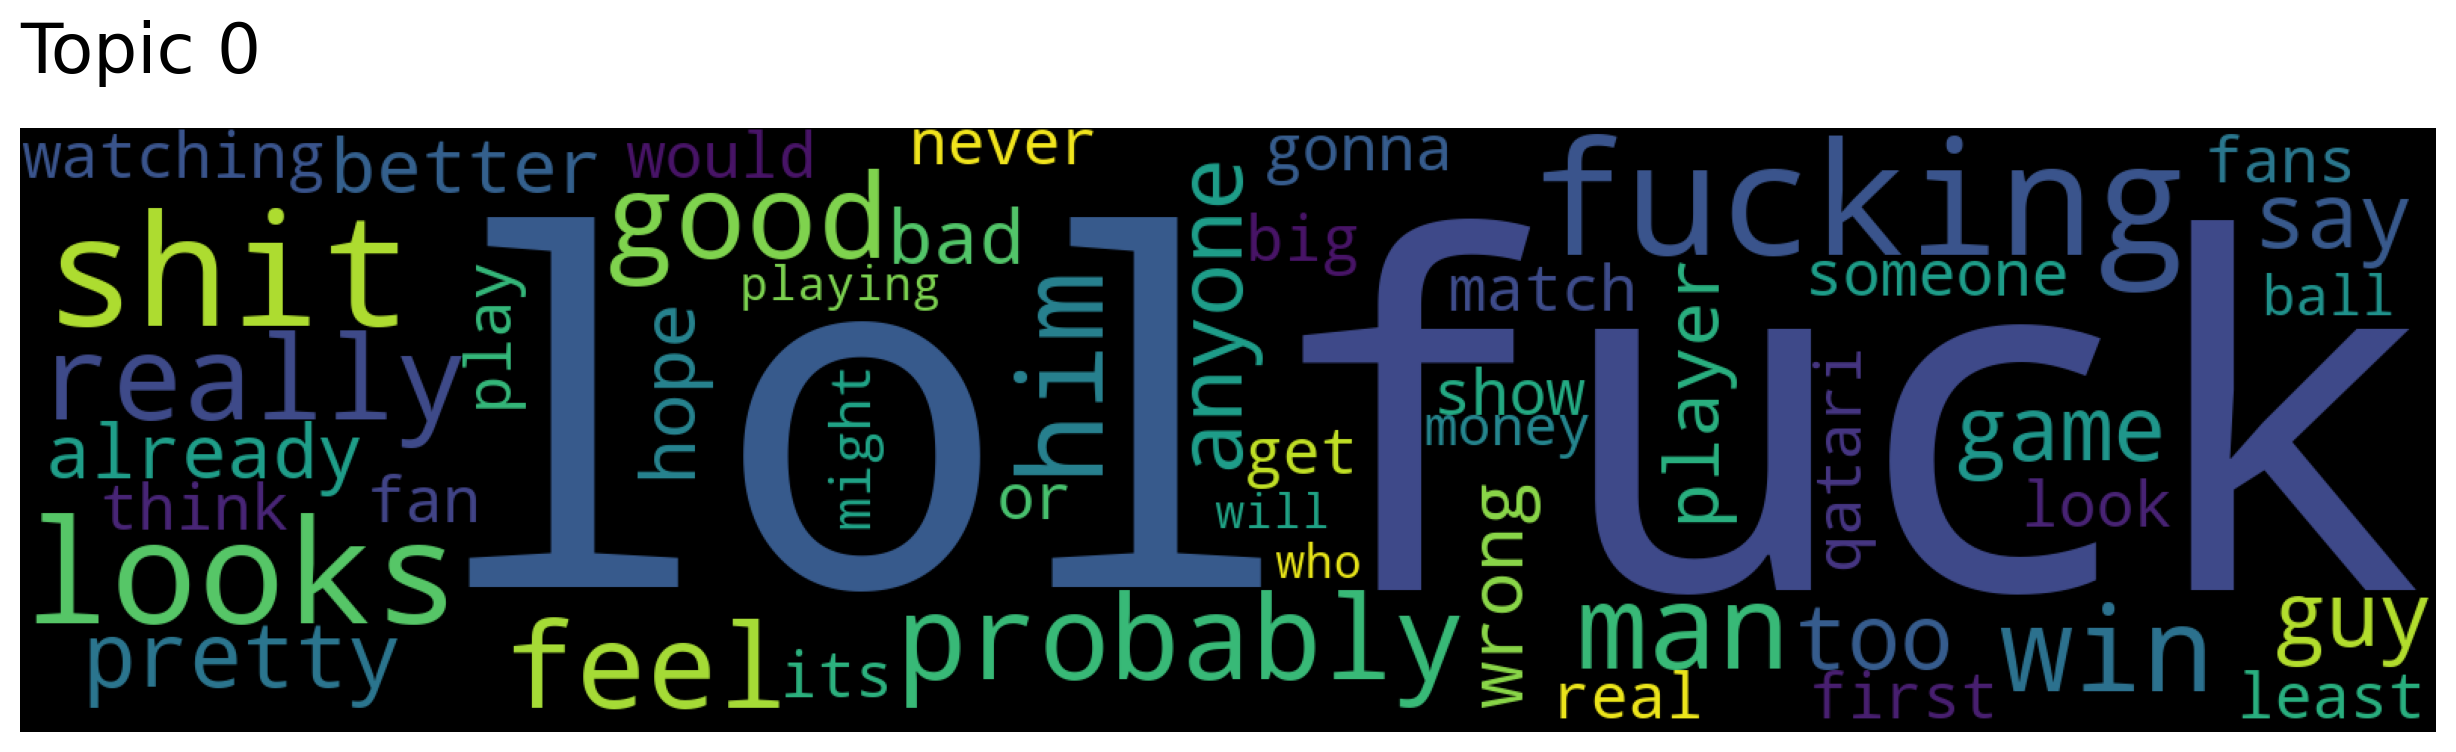

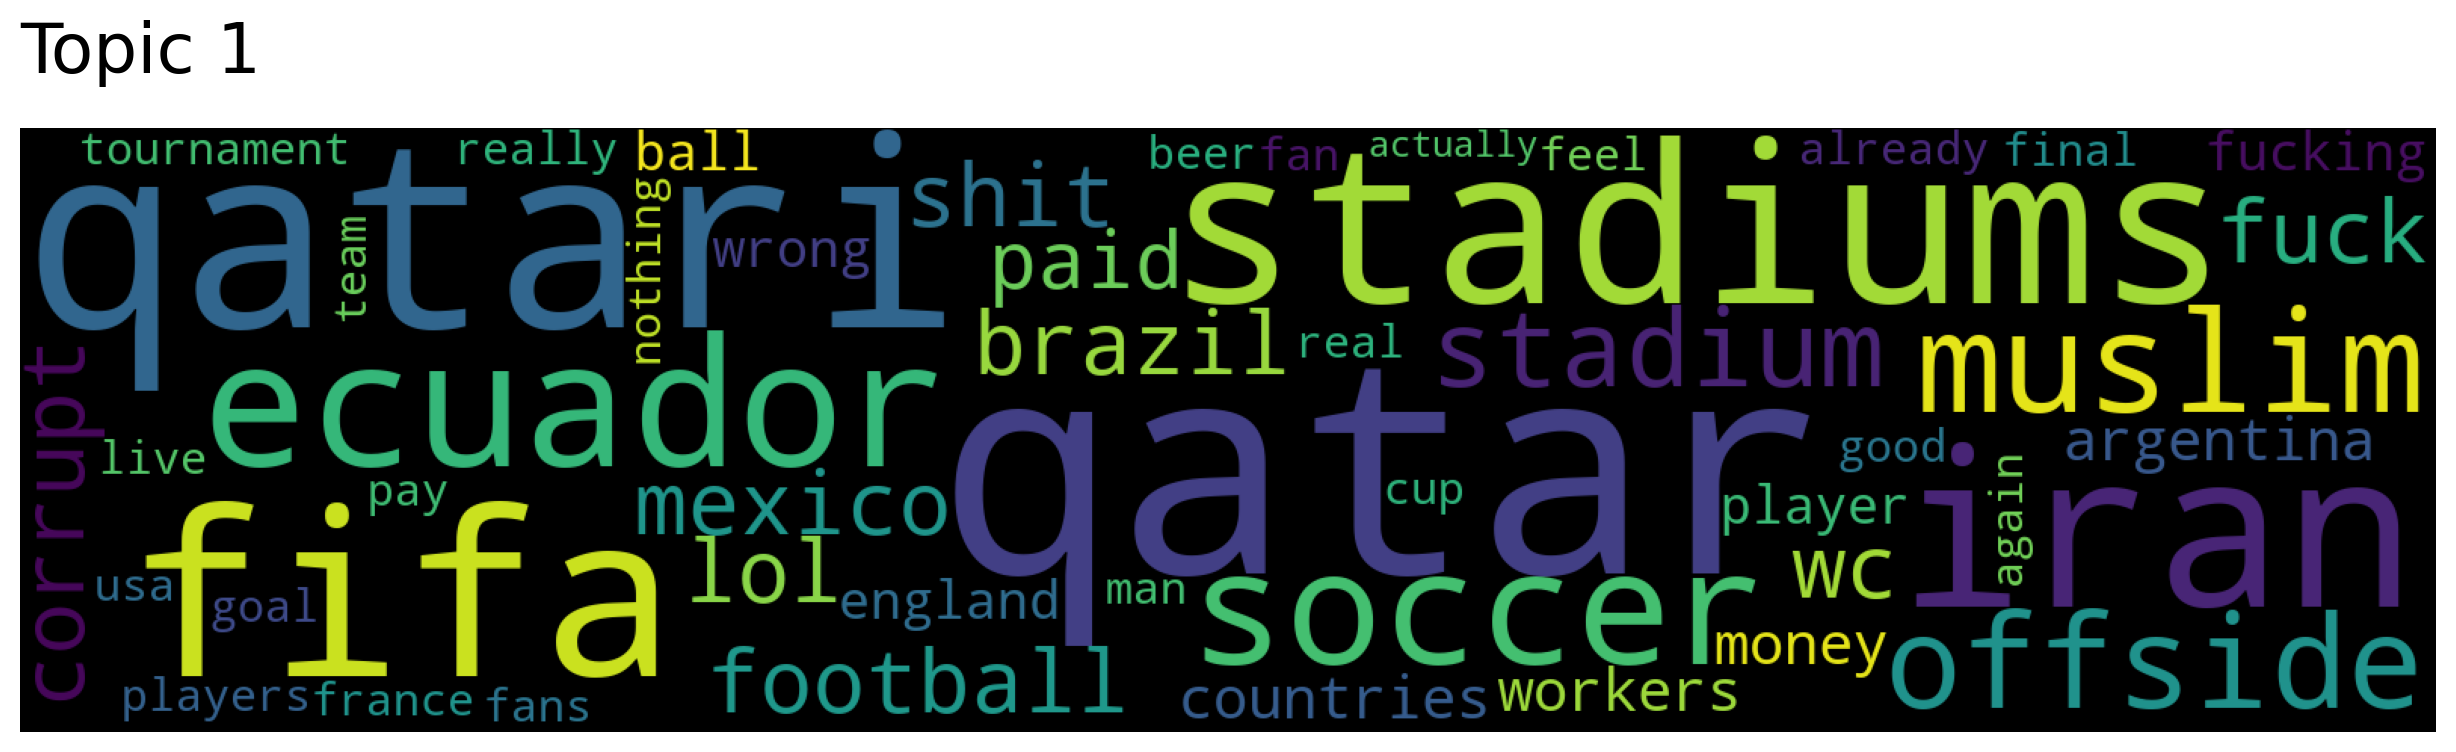

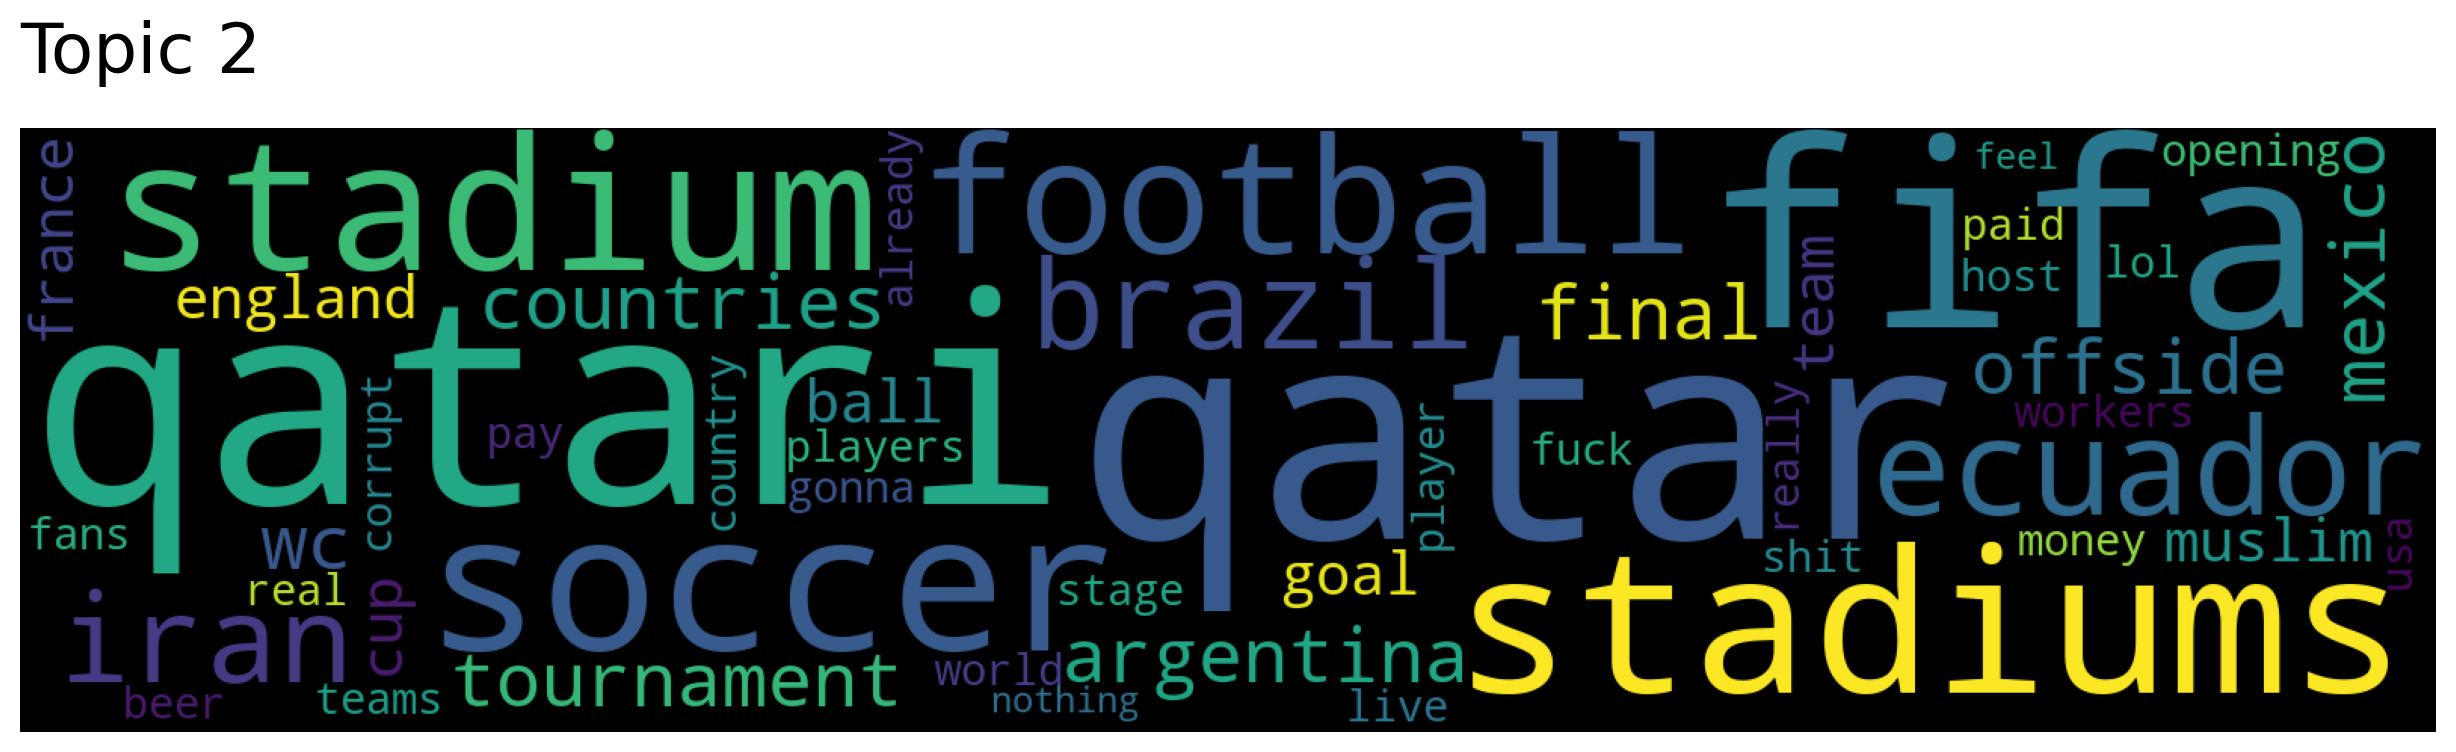

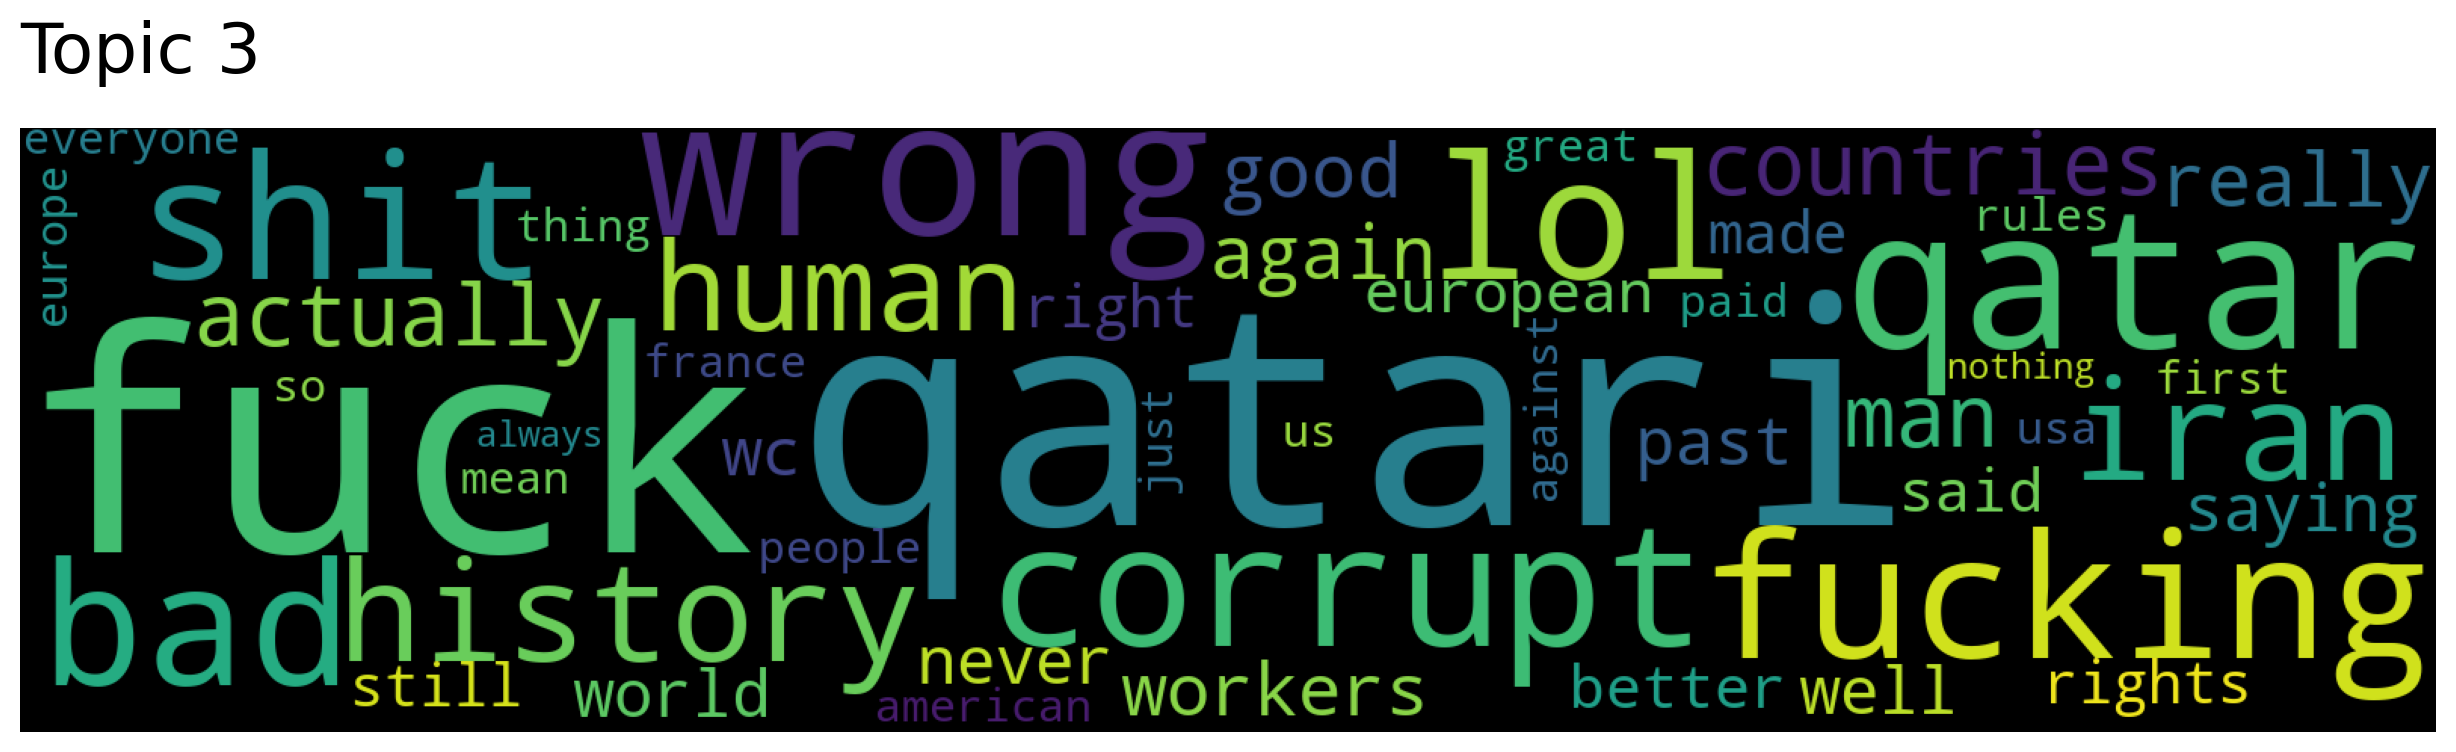

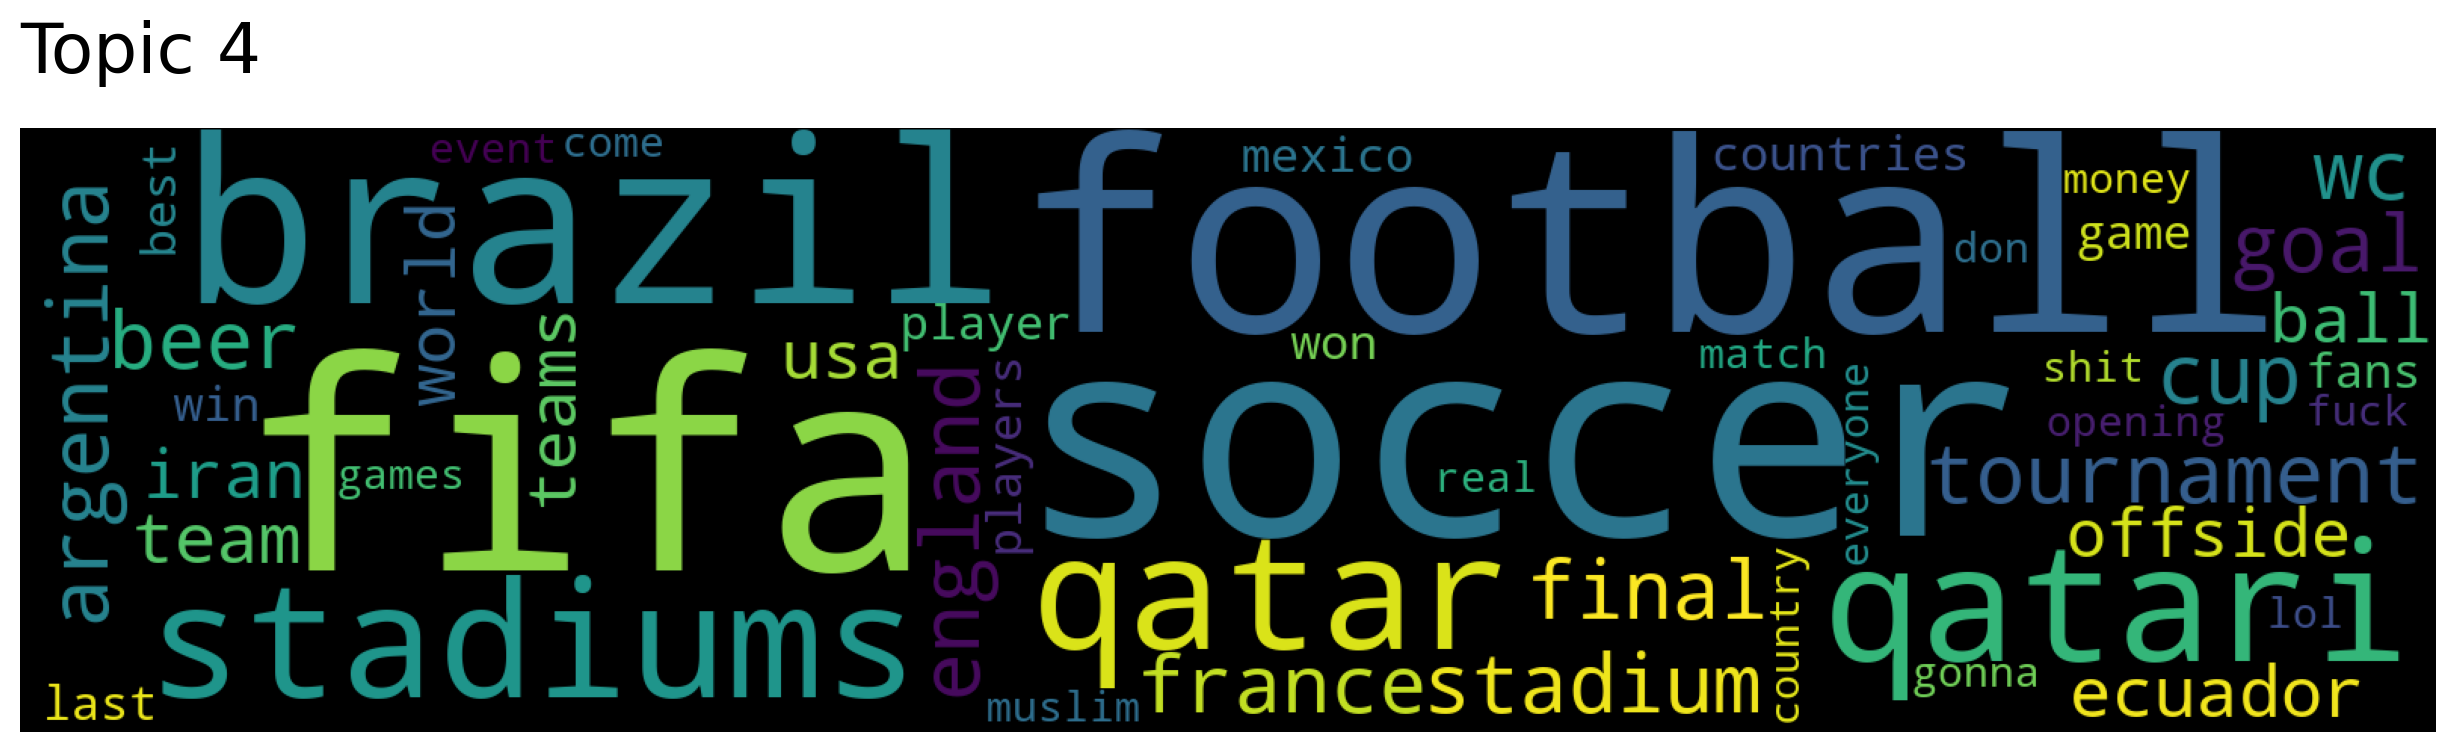

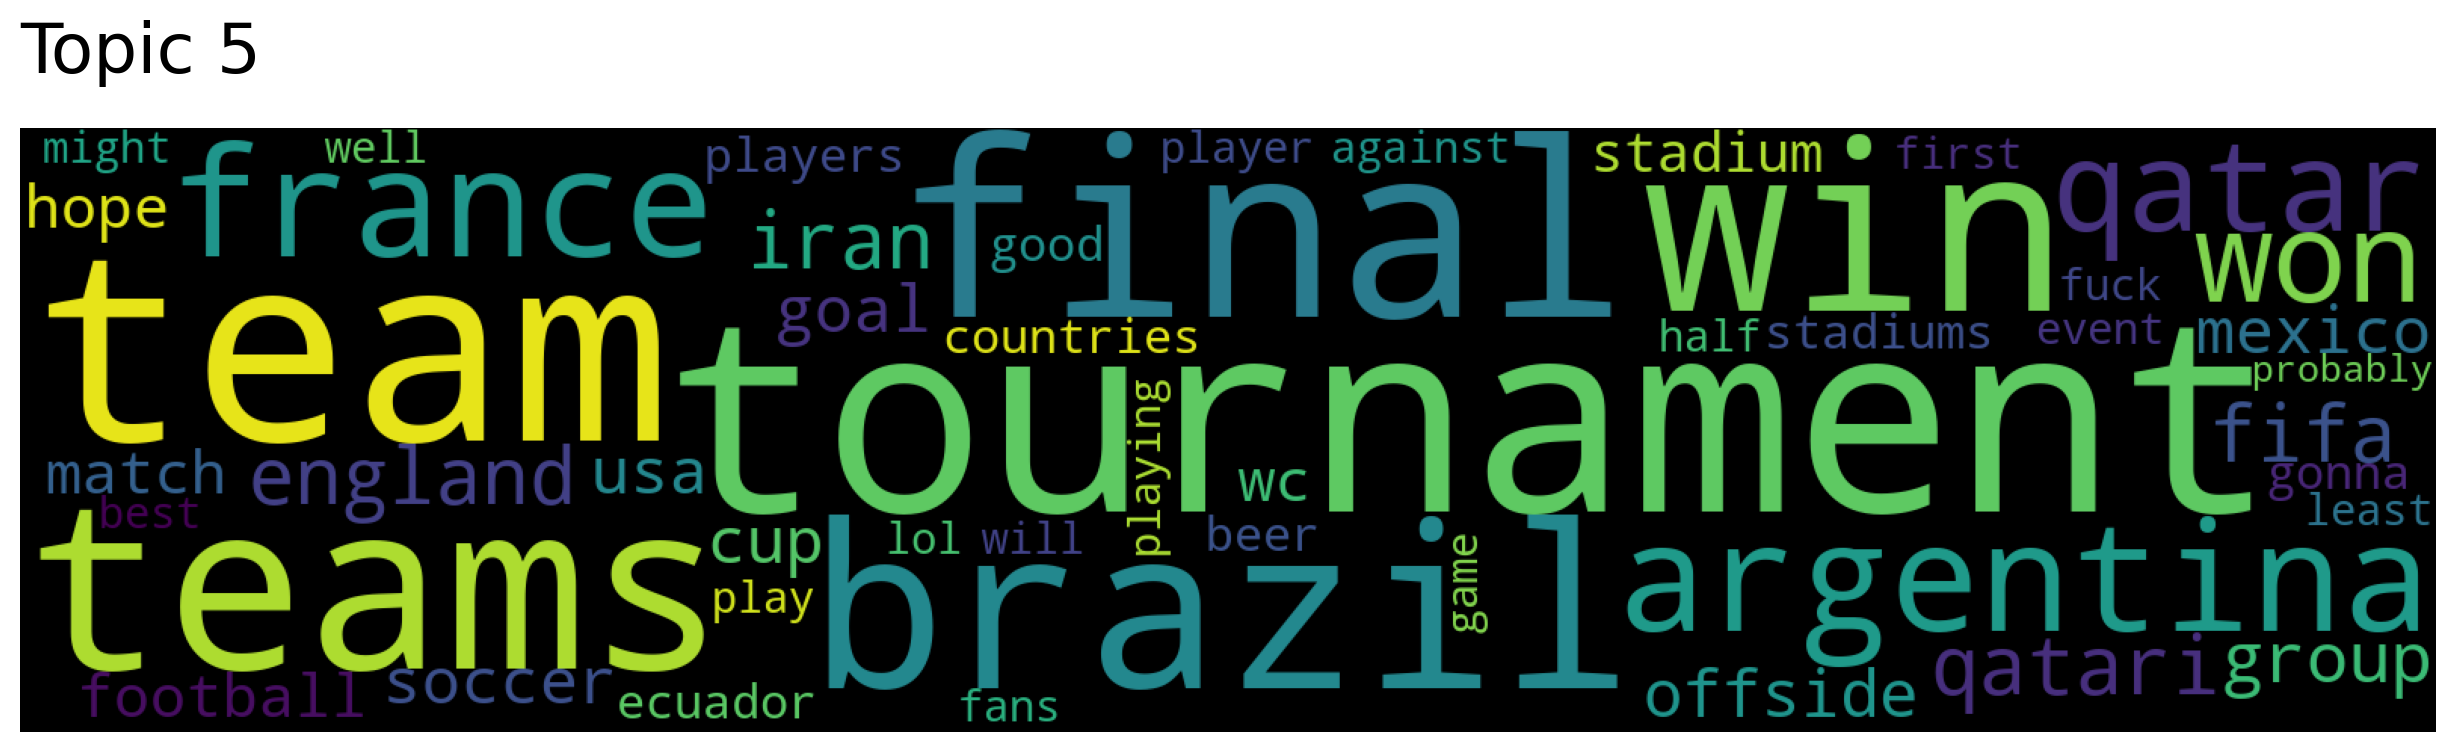

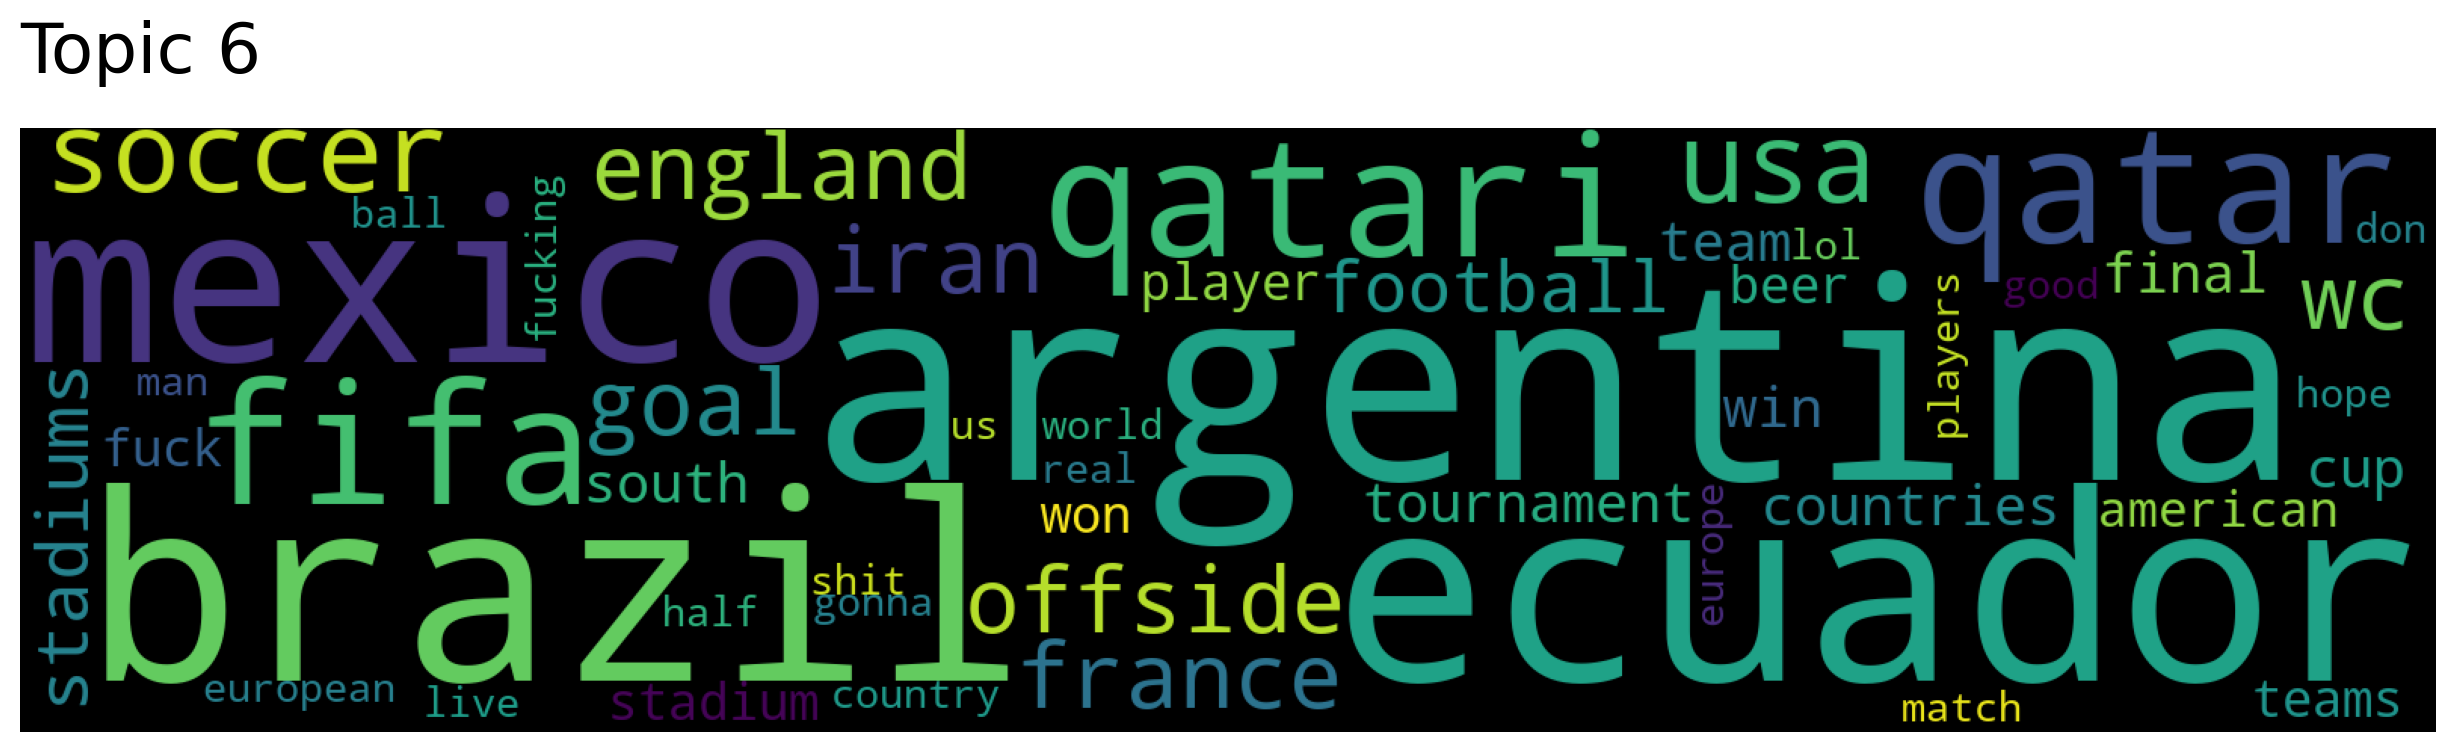

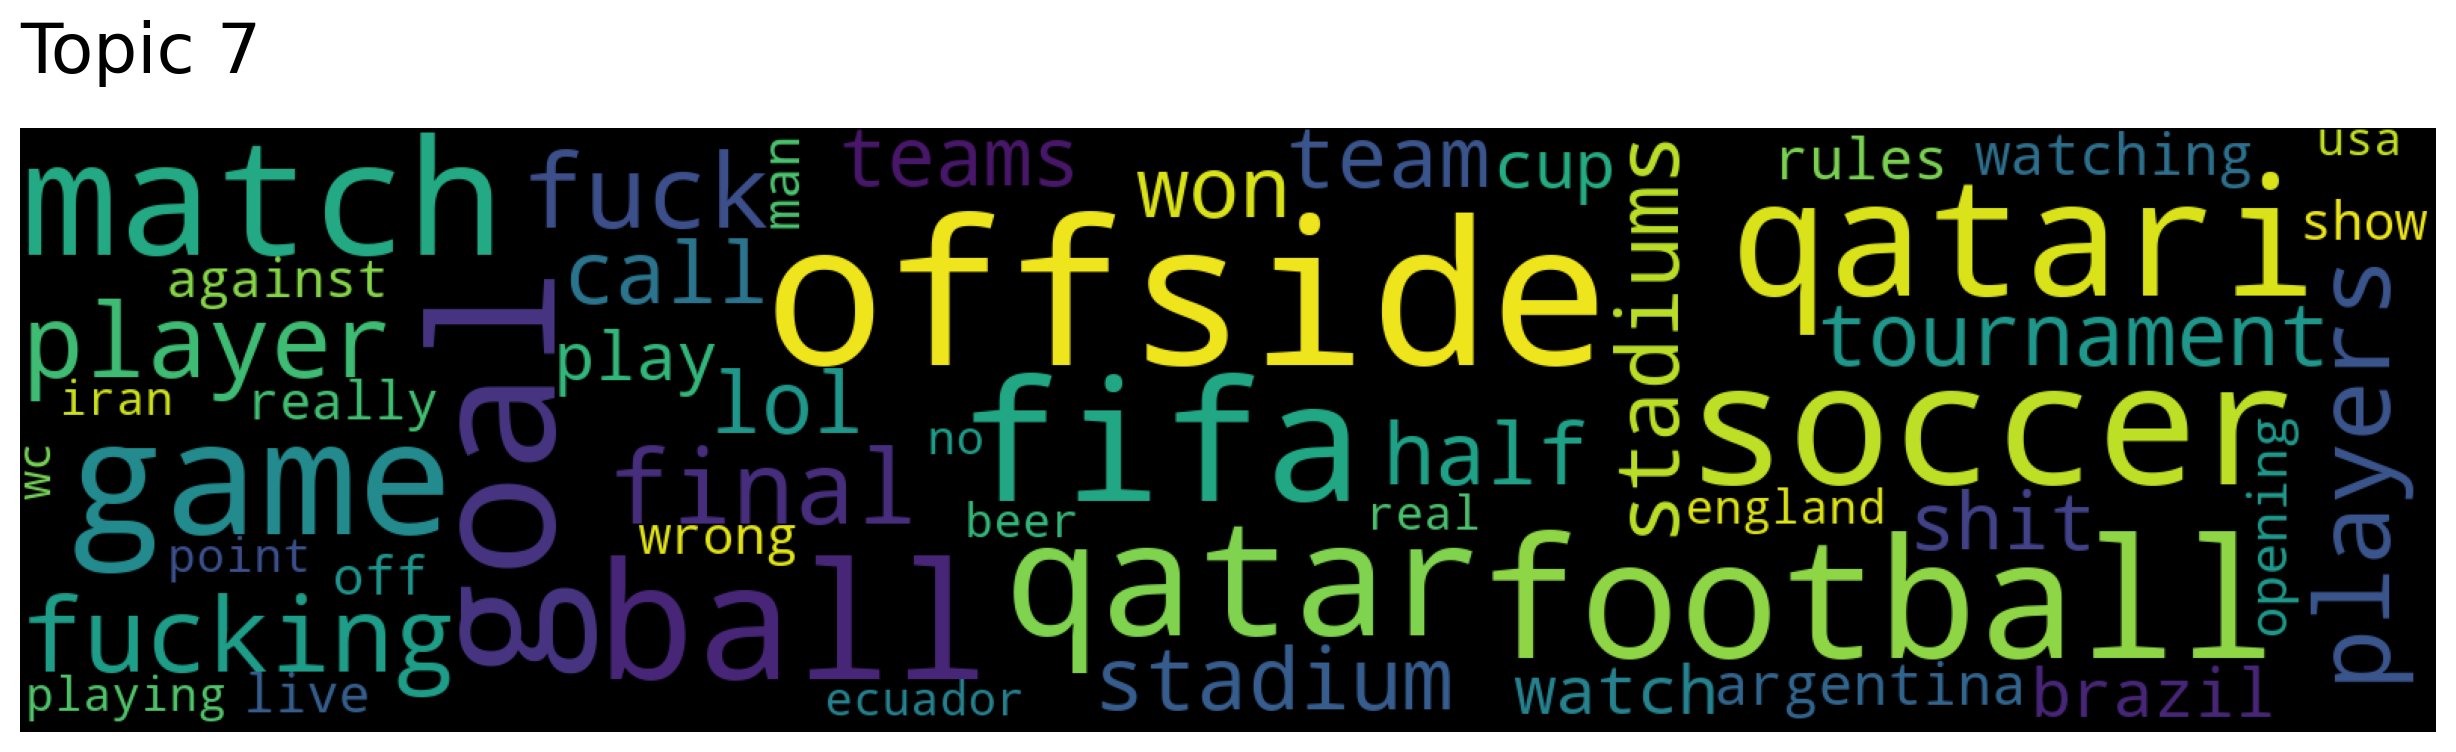

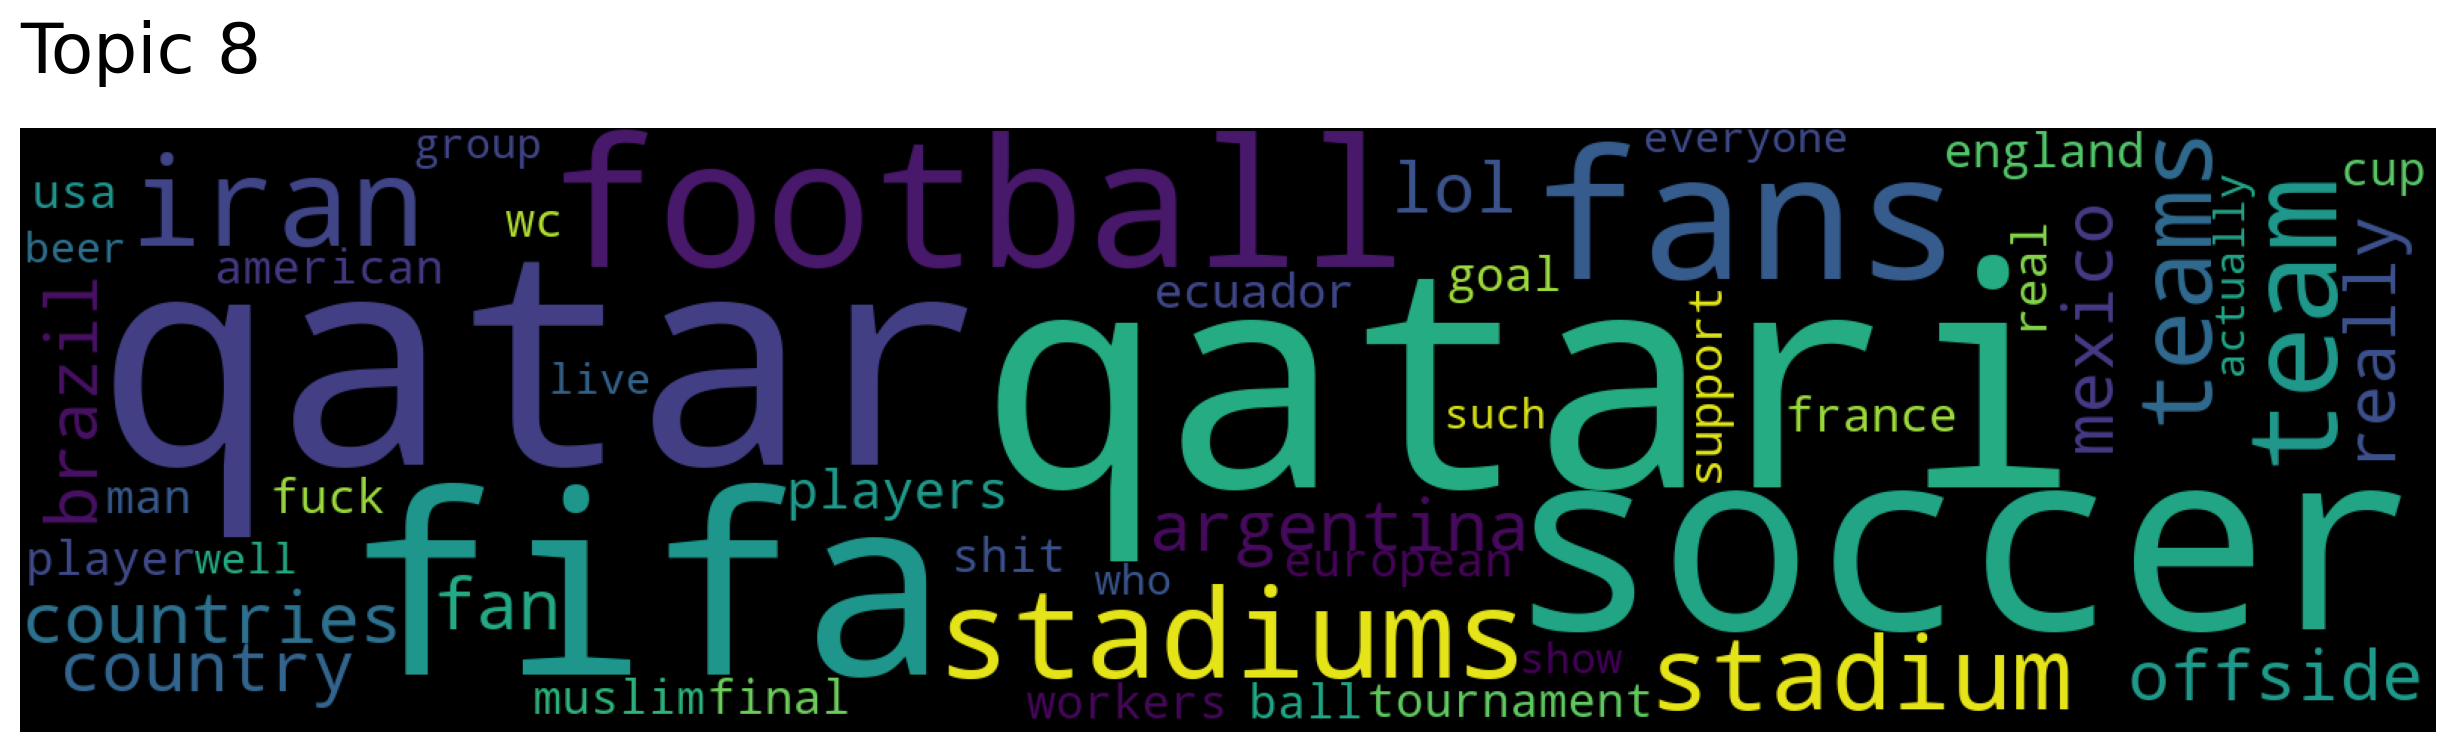

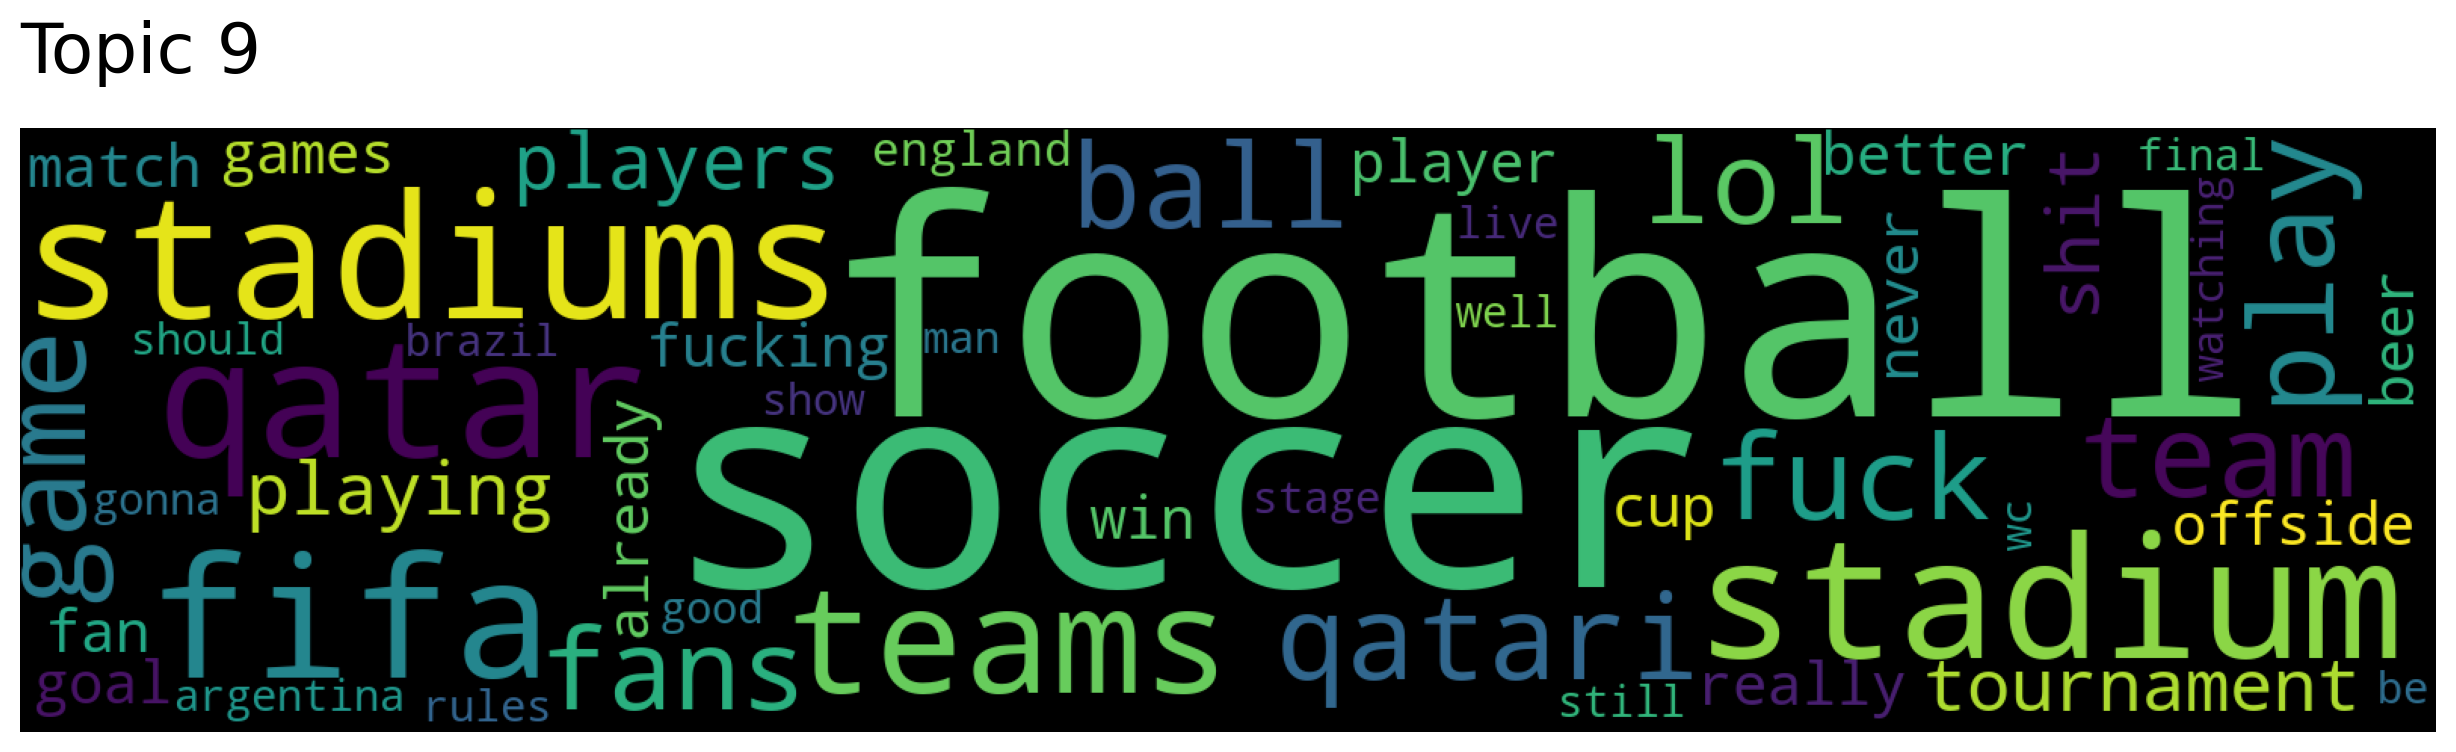

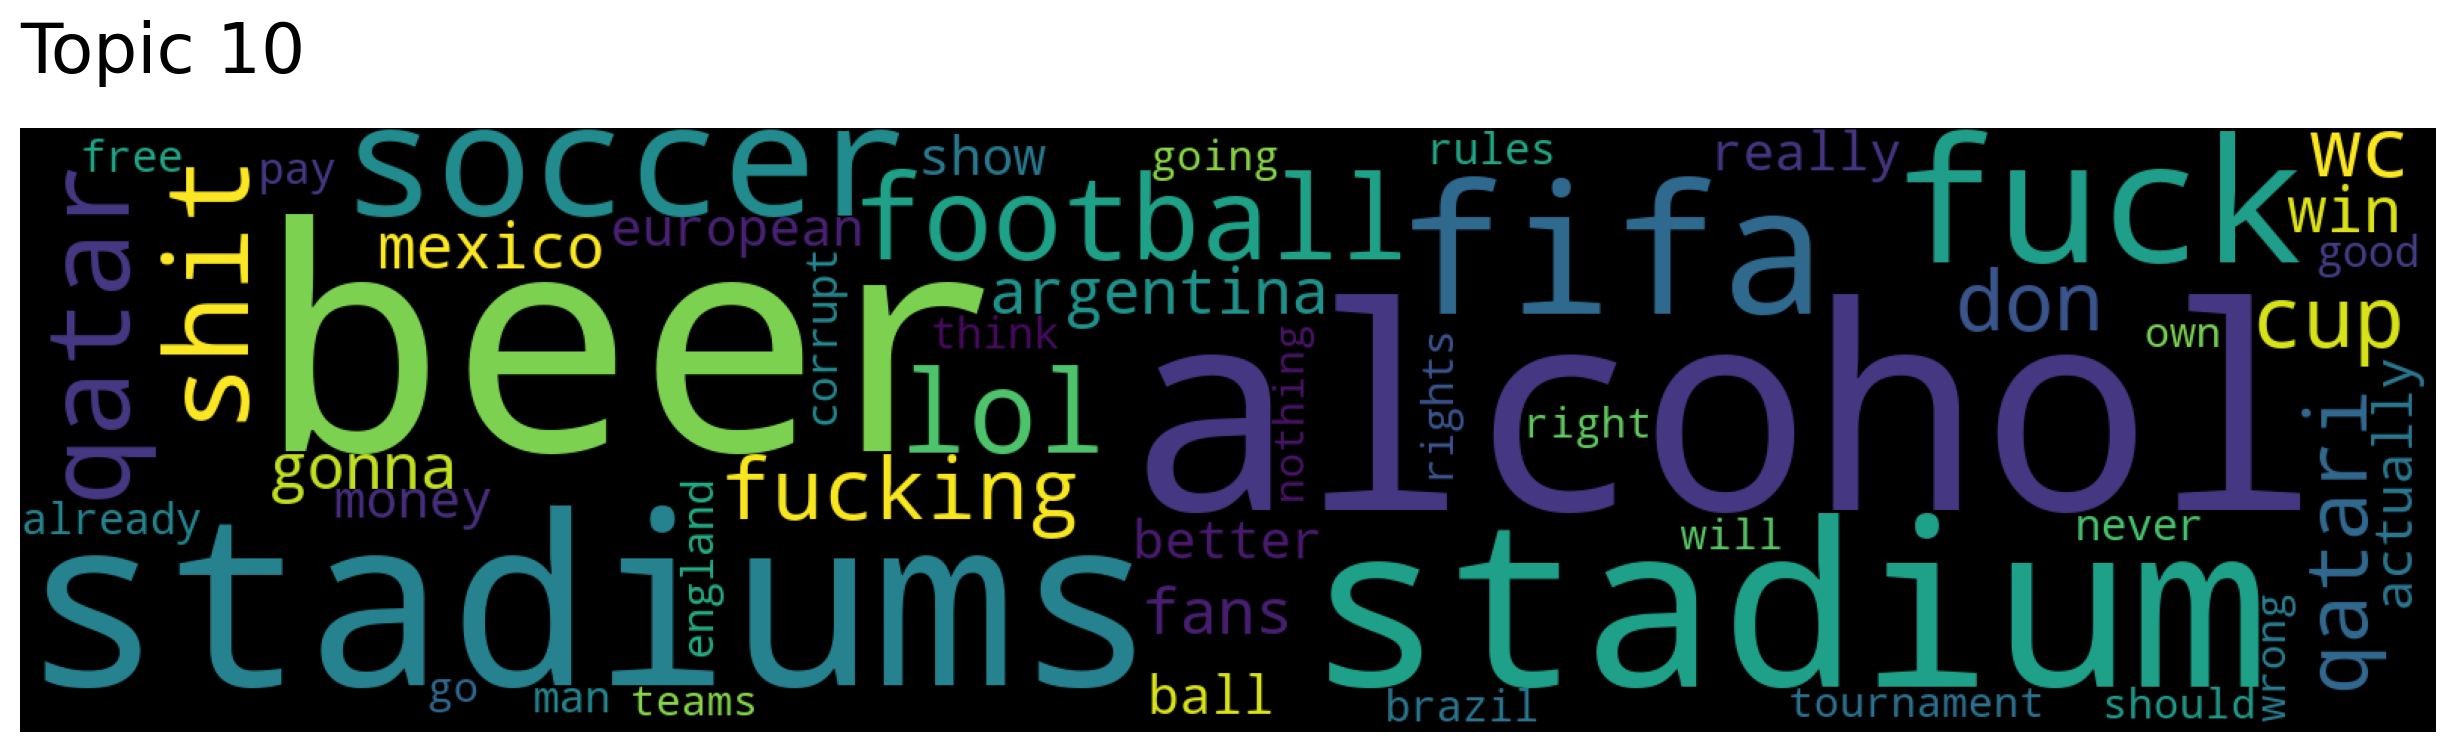

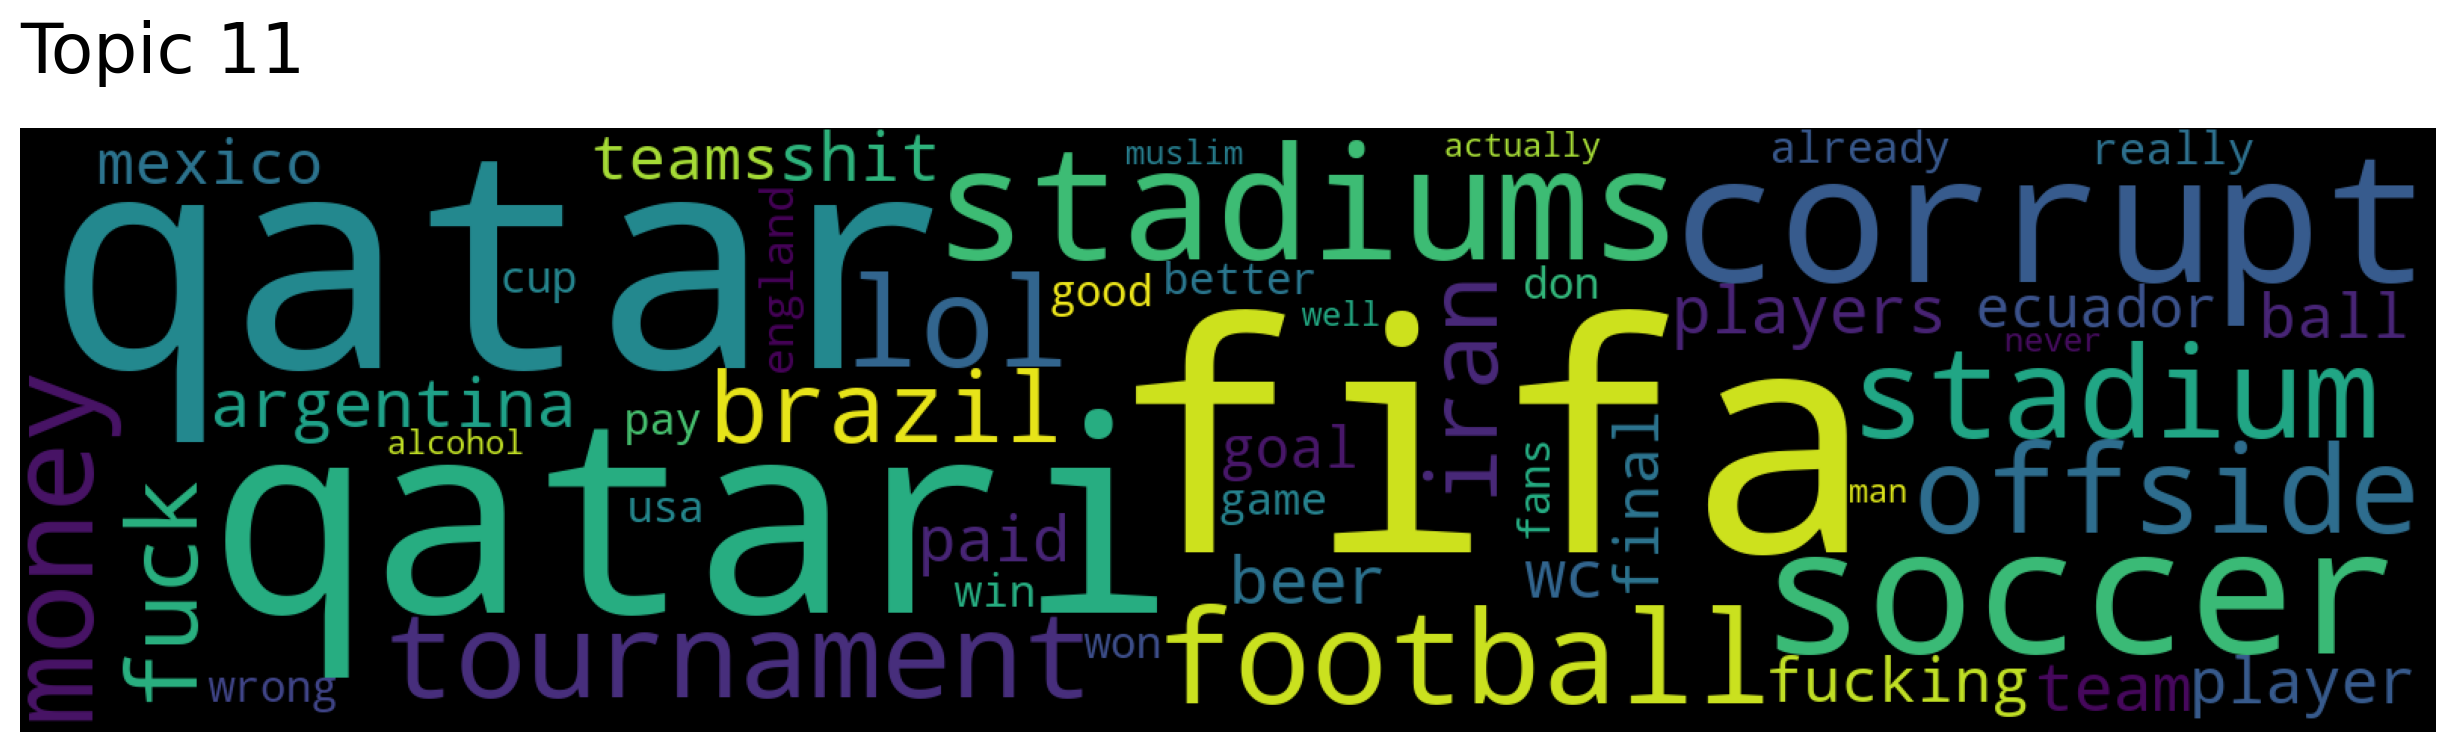

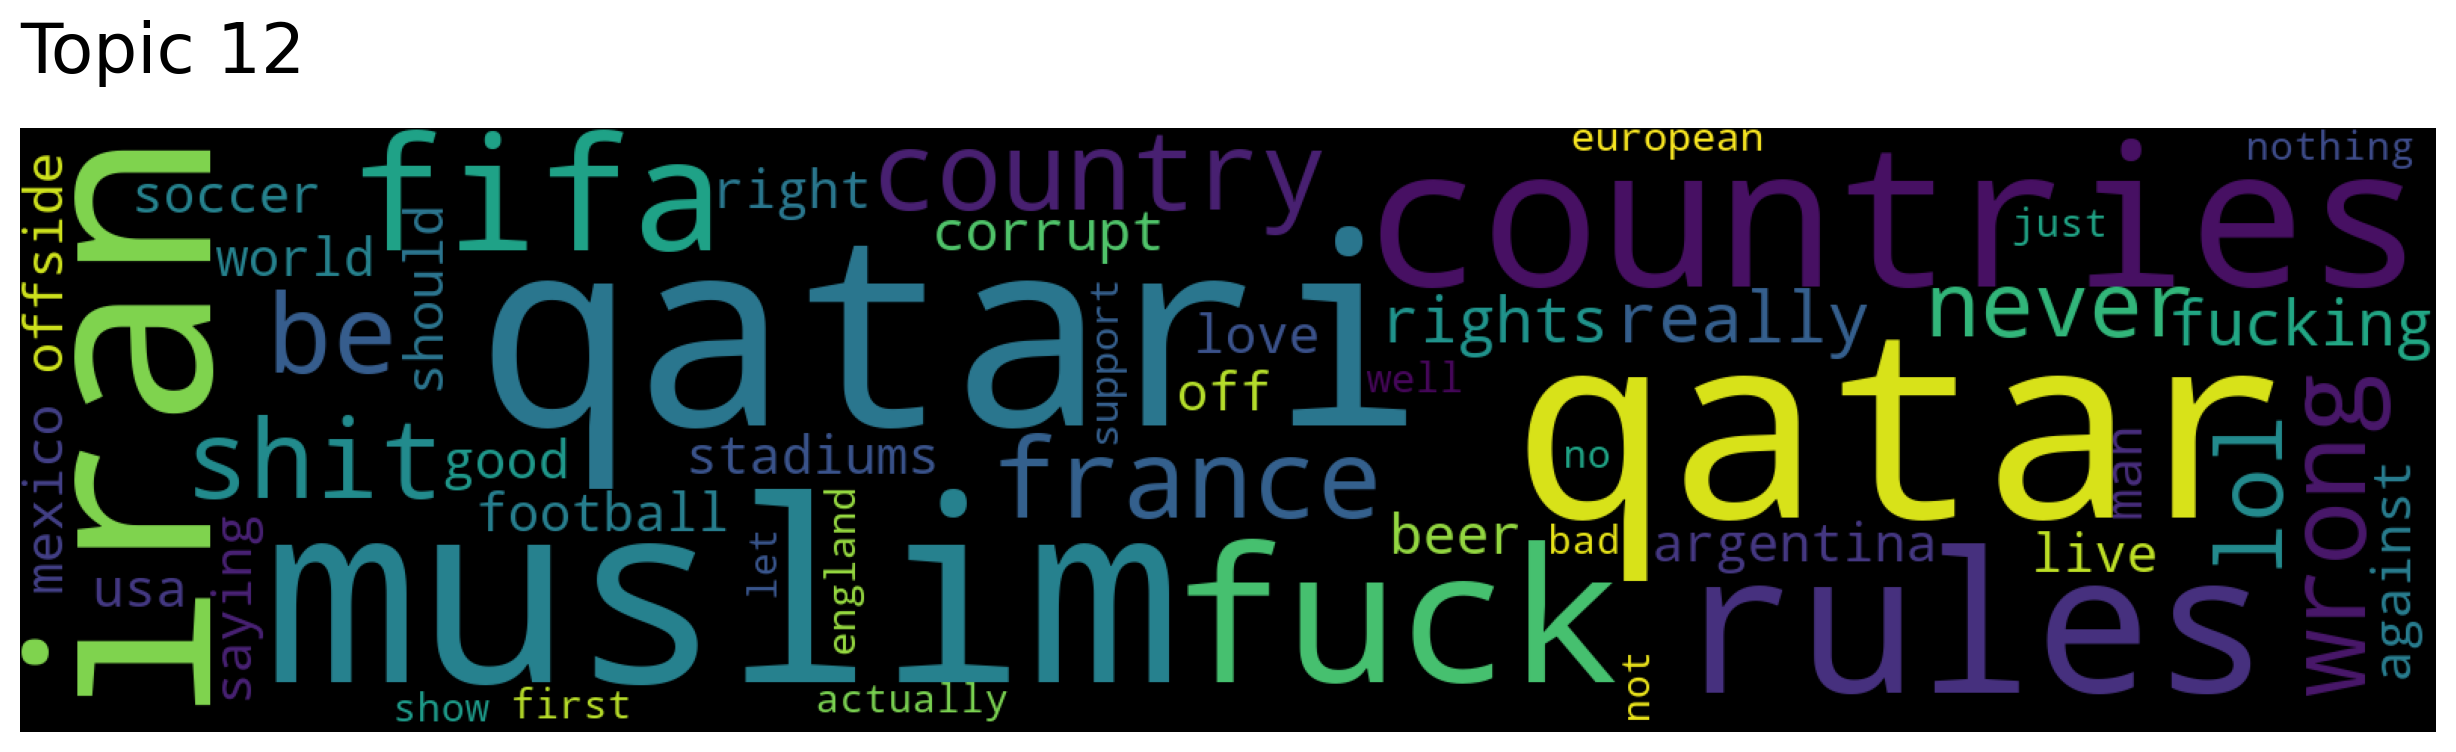

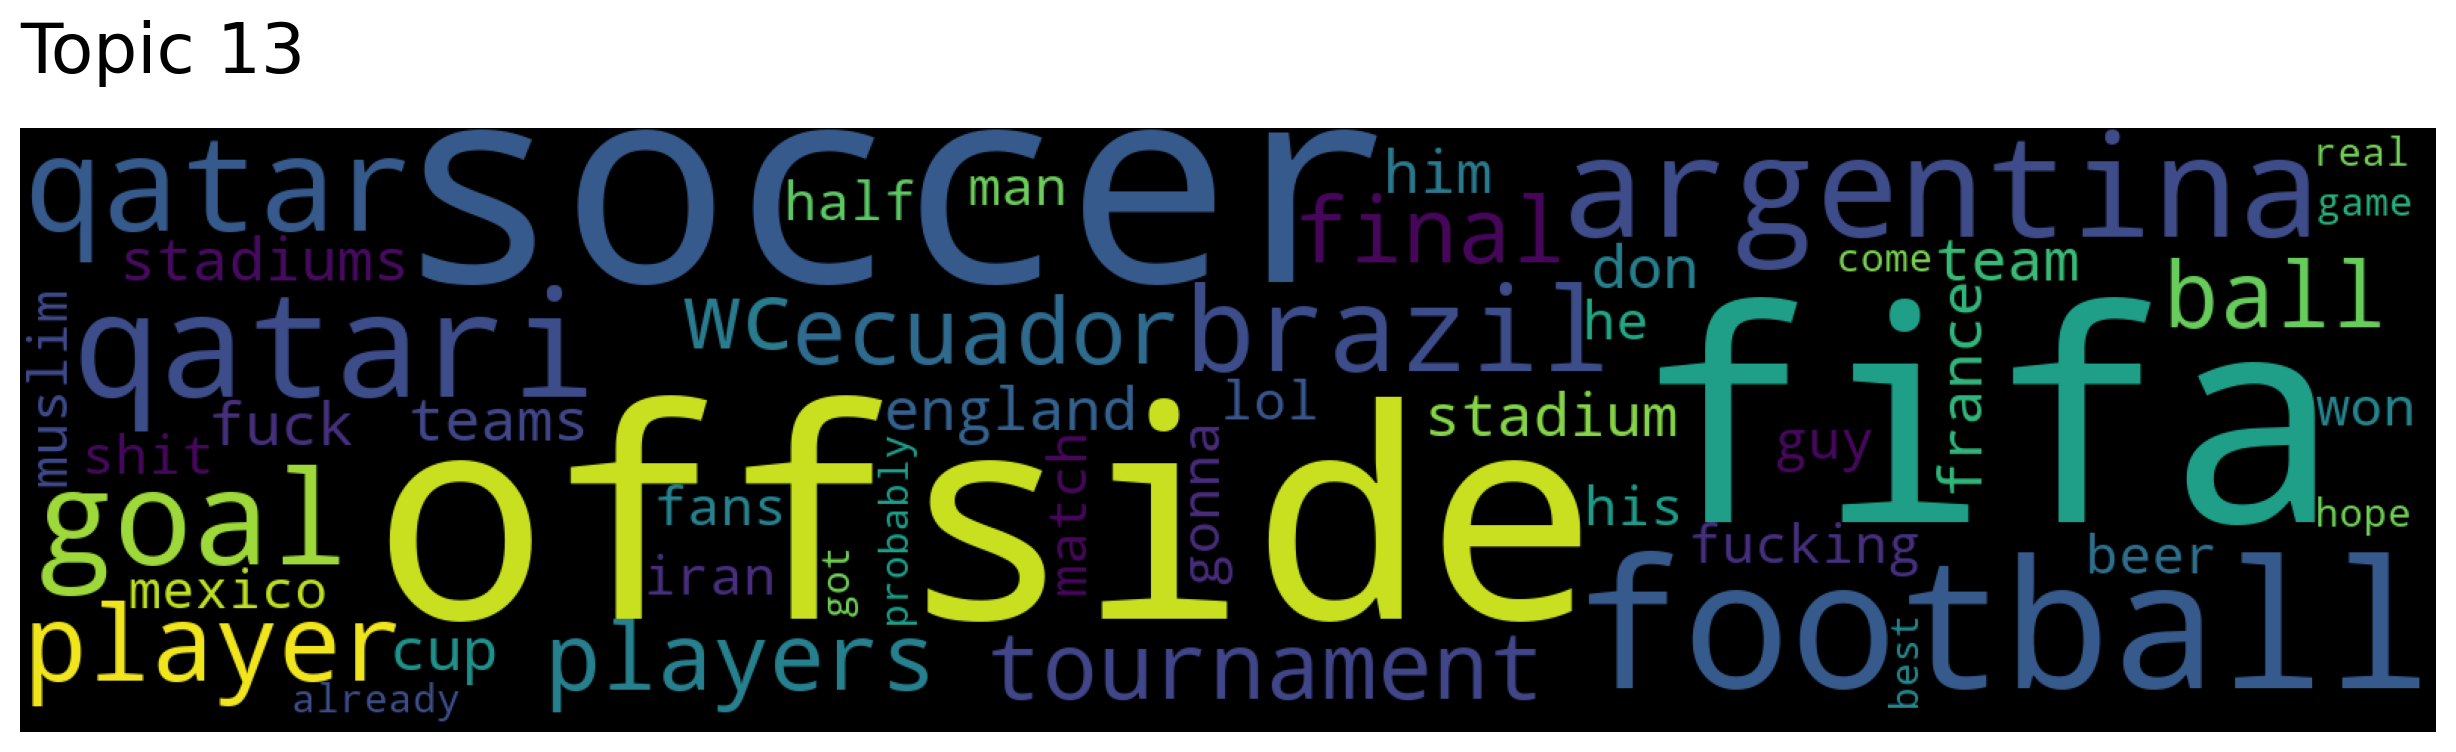

In [65]:
topic_words, word_scores, topic_nums = top2vec.get_topics(reduced=True)

for topic in topic_nums[0:14]:
    top2vec.generate_topic_wordcloud(topic, reduced=True)#, background_color="black")

In [ ]:
Want to save: Topic Number, number of documents assigned, Merged Topic Number(?), Top words, example documents, document number